period T =  1
frequency freq =  1.0
20


/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


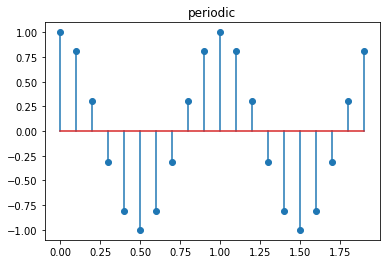

/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


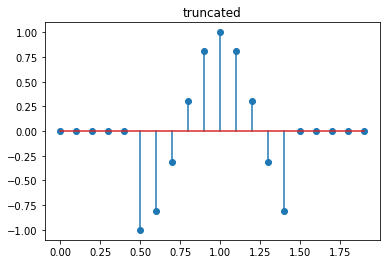

In [57]:
import numpy as np
from matplotlib import pyplot as plt

# generate a cosine signal of period T 

# period and frequncy
T = 1
freq = 1 / T
print("period T = ", T)
print("frequency freq = ", freq)

#step size
deltaT = 0.1
# start position
Tstart = 0
# end position
Tend = 2*T
# number of points
numT = int((Tend-Tstart)/deltaT)



# define t range
t = np.linspace(Tstart,Tend-deltaT,numT)
print(len(t))

# generate signal
sig = np.cos(2*np.pi*freq*t)

# truncated signal
sig_tr = np.copy(sig)
sig_tr[:5]=0
sig_tr[15:]=0

#plot
plt.stem(t,sig)
plt.title("periodic")
plt.show()
#plot
plt.stem(t,sig_tr)
plt.title("truncated")
plt.show()


 ## Manual definition  of frequency bins vs scipy's fftfreq

### Manual - all freq

In [58]:
from scipy.fftpack import rfft, rfftfreq, fft, fftfreq
from scipy.signal import blackman

# compute FT amplitude of periodic
sig_ft = np.abs(fft(sig))

numT  20
numF  20
Fmax to plot  10.0


/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


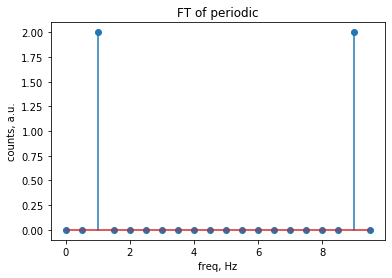

In [64]:
# manual definition of frequency range
# plot all frequencies (the whole positive-negative freq. range yielded by FFT)
numF = numT
print("numT ",numT)
print("numF ",numF)

# manually define frequency range to plot within (the max possible) 
Fmax = 1.0 / deltaT 
freq_range = np.linspace(0, Fmax, numF, endpoint=False)

print("Fmax to plot ", Fmax)



plt.stem(freq_range, 2*deltaT*sig_ft)
plt.title("FT of periodic")
plt.xlabel("freq, Hz")
plt.ylabel("counts, a.u.")
plt.show()

### Manual -  freq >0

numT  20
numF  10
Fmax to plot  5.0


/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


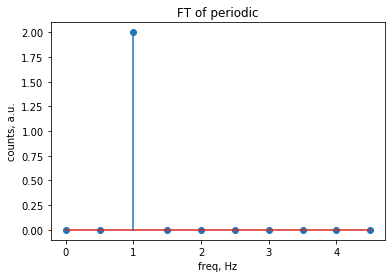

In [63]:
# manual definition of frequency range
# plot only positive-valued frequencies (left half of the whole positive-negative freq. range yielded by FFT)

numF = int(numT // 2)
print("numT ",numT)
print("numF ",numF)

# manually define frequency range to plot within ((1/2) of the max possible)
Fmax = (1/2) * 1 / deltaT 
freq_range = np.linspace(0, Fmax, numF, endpoint=False)

print("Fmax to plot ", Fmax)



plt.stem(freq_range, 2*deltaT*sig_ft[0:int(numF)])
plt.title("FT of periodic")
plt.xlabel("freq, Hz")
plt.ylabel("counts, a.u.")
plt.show()

### scipy.fftfreq - all freq

/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


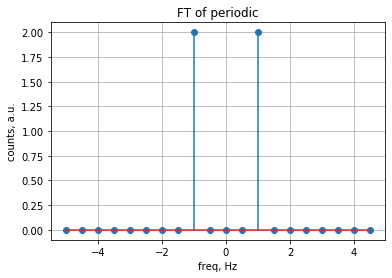

In [66]:
#  definition of frequency range by fftfreq

# full freq. range

freq_samples = fftfreq(int(numT), deltaT)



plt.stem(freq_samples, 2*deltaT*sig_ft)
plt.grid()
plt.title("FT of periodic")
plt.xlabel("freq, Hz")
plt.ylabel("counts, a.u.")
plt.show()




### scipy.fftfreq -  freq > 0

numT  20
numF  10


/Users/Pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


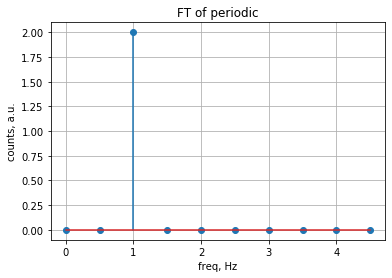

In [67]:
#  definition of frequency range by fftfreq

# 1/2 of  freq. range - only positive-valued frequencies 

freq_samples = fftfreq(int(numT), deltaT)

numF = int(numT // 2)
print("numT ",numT)
print("numF ",numF)


plt.stem(freq_samples[0:numF], 2*deltaT*sig_ft[0:numF])
plt.grid()
plt.title("FT of periodic")
plt.xlabel("freq, Hz")
plt.ylabel("counts, a.u.")
plt.show()


